# Lasso Regression

Lasso Regression (Least Absolute Shrinkage and Selection Operator) is a linear regression model that applies L1 regularization. Unlike Ridge regression, Lasso can shrink some coefficients to exactly zero, which makes it useful for feature selection.

Lasso Regression Formula
The cost function for Lasso regression is:

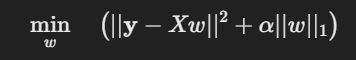

Where:

* y is the vector of target values.
* 𝑋 is the matrix of input features.
* w are the model parameters (weights).
* α is the regularization parameter that controls the strength of the penalty.
* ∣∣𝑤∣∣1  is the L1 norm (sum of the absolute values of the coefficients).

The Lasso regression penalizes large coefficients, but unlike Ridge, it can force some coefficients to be exactly zero, which is useful for reducing the number of features in the model.

Key Difference:
* Ridge: Uses L2 regularization (penalty term ∣∣𝑤∣∣^2), shrinking all coefficients towards zero.
* Lasso: Uses L1 regularization (penalty term ∣∣w∣∣^ 1), which can shrink some coefficients to zero, performing feature selection.

Explanation:
* alpha controls the regularization strength. Increasing alpha increases the penalty and drives more coefficients to zero.
* The higher the value of alpha, the more features are removed by Lasso, making the model simpler and helping with overfitting.
* r2_score and mean_squared_error are metrics used to evaluate the model’s performance.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

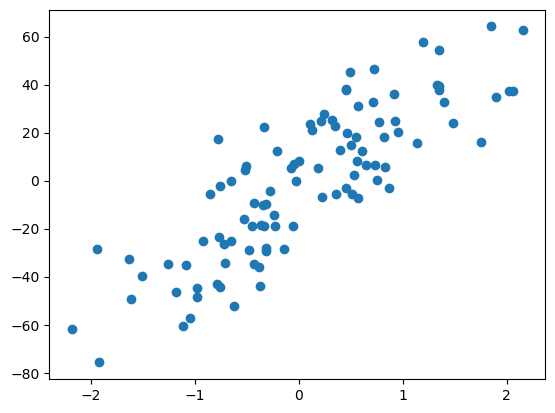

In [11]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

plt.scatter(X,y)

In [13]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)

[29.64946467]
-2.819579596837646


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.131e+04, tolerance: 7.964e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_d

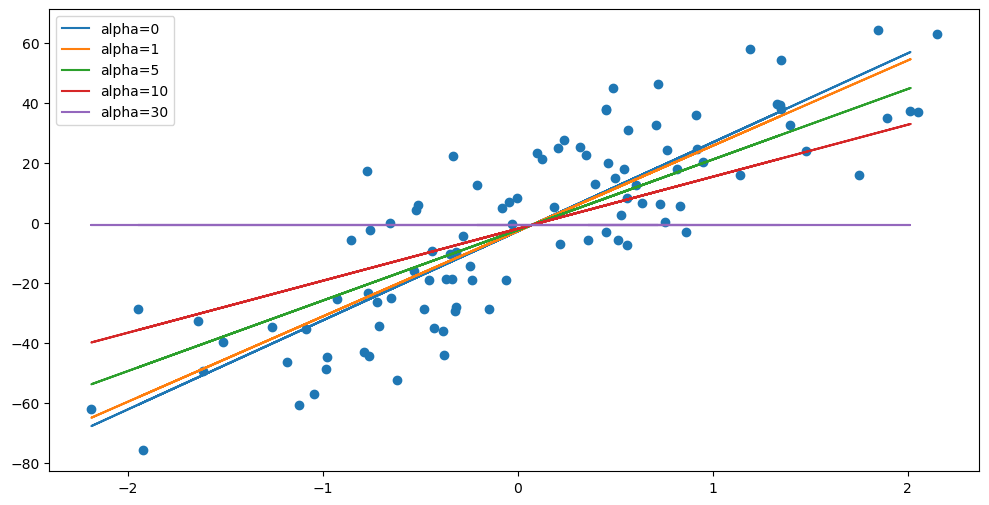

In [15]:
alphas = [0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
    L = Lasso(alpha=i)
    L.fit(X_train,y_train)
    plt.plot(X_test,L.predict(X_test),label='alpha={}'.format(i))
plt.legend()
plt.show()